# Explore here

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Your code here
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv', sep = ',')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
data.shape

(1338, 7)

In [7]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [34]:
data.duplicated().sum()

np.int64(1)

In [86]:
data.drop_duplicates(inplace=True)

In [88]:
data.duplicated().any()

np.False_

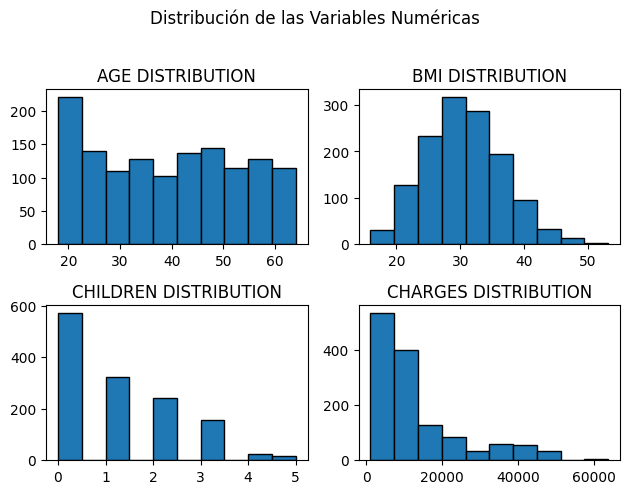

In [20]:
fig, ax = plt.subplots(2,2)

ax[0,0].hist(data['age'], bins = 10, edgecolor = 'black')
ax[0,0].set_title('AGE DISTRIBUTION')

ax[0,1].hist(data['bmi'], bins = 10, edgecolor = 'black')
ax[0,1].set_title('BMI DISTRIBUTION')

ax[1,0].hist(data['children'], bins = 10, edgecolor = 'black')
ax[1,0].set_title('CHILDREN DISTRIBUTION')

ax[1,1].hist(data['charges'], bins = 10, edgecolor = 'black')
ax[1,1].set_title('CHARGES DISTRIBUTION')

fig.suptitle('Distribución de las Variables Numéricas', y=1.02)
plt.tight_layout()
plt.show()

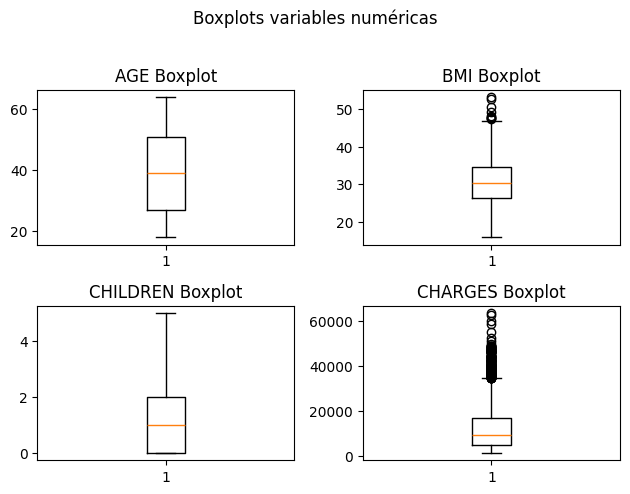

In [24]:
fig, ax = plt.subplots(2,2)

ax[0,0].boxplot(data['age'])
ax[0,0].set_title('AGE Boxplot')

ax[0,1].boxplot(data['bmi'])
ax[0,1].set_title('BMI Boxplot')

ax[1,0].boxplot(data['children'])
ax[1,0].set_title('CHILDREN Boxplot')

ax[1,1].boxplot(data['charges'])
ax[1,1].set_title('CHARGES Boxplot')

fig.suptitle('Boxplots variables numéricas', y = 1.02)
plt.tight_layout()
plt.show()

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [25]:
data.skew(numeric_only= True)

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

Como se puede observar la variable objetivo tiene un poco de cola hacia la derecha (skew positiva), cómo estamos realizando una regresión lineal esto podría afectar a los coeficientes de los estimadores y por ende la precisón del modelo. Para ajustar los outliers voy a transformar la variable objectivo 'charges' a escala logaritmica.

In [89]:
#Ajuste variable "charges"
data['charges_log'] = np.log(data['charges'])
data.drop('charges', axis= 1, inplace= True)
data.head()

,age,sex,bmi,children,smoker,region,charges_log
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


<Axes: >

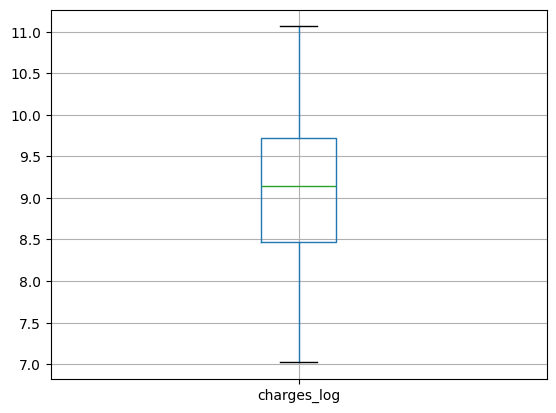

In [90]:
#Hago el boxplot de charges escalado a escala logaritmica para comprovar si aún existen valores atípicos
data.boxplot('charges_log')

In [126]:
encoder = OneHotEncoder(sparse_output=False)
encoded_arr = encoder.fit_transform(data[['sex', 'smoker']])

In [127]:
df = pd.DataFrame(encoded_arr, columns=encoder.get_feature_names_out(['sex', 'smoker']))

In [128]:
data = data.reset_index(drop=True)
df = df.reset_index(drop=True)

In [129]:
df_final = pd.concat([data, df], axis=1)

In [130]:
df_final.drop(columns=['smoker_no', 'sex_female', 'sex', 'smoker'], inplace=True)

In [131]:
df_final.head()

,age,bmi,children,region,charges_log,sex_male,smoker_yes
0,19,27.900,0,southwest,9.734176,0.0,1.0
1,18,33.770,1,southeast,7.453302,1.0,0.0
2,28,33.000,3,southeast,8.400538,1.0,0.0
3,33,22.705,0,northwest,9.998092,1.0,0.0
4,32,28.880,0,northwest,8.260197,1.0,0.0


In [132]:
tar_enc = ce.TargetEncoder(cols= 'region')
#Fit y transformar la variabnle region
df_final['region_enc'] = tar_enc.fit_transform(df_final['region'], df_final['charges_log'])

In [133]:
df_final.drop('region', axis = 1, inplace=True)

In [134]:
df_final

,age,bmi,children,charges_log,sex_male,smoker_yes,region_enc
0,19,27.900,0,9.734176,0.0,1.0,9.031098
1,18,33.770,1,7.453302,1.0,0.0,9.122402
2,28,33.000,3,8.400538,1.0,0.0,9.122402
3,33,22.705,0,9.998092,1.0,0.0,9.074880
4,32,28.880,0,8.260197,1.0,0.0,9.074880
...,...,...,...,...,...,...,...
1332,50,30.970,3,9.268661,1.0,0.0,9.074880
1333,18,31.920,0,7.698927,0.0,0.0,9.168768
1334,18,36.850,0,7.396233,0.0,0.0,9.122402
1335,21,25.800,0,7.604867,0.0,0.0,9.031098


In [136]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.000000,27.00000,39.000000,51.000000,64.000000
bmi,1337.0,30.663452,6.100468,15.960000,26.29000,30.400000,34.700000,53.130000
children,1337.0,1.095737,1.205571,0.000000,0.00000,1.000000,2.000000,5.000000
charges_log,1337.0,9.099928,0.918699,7.022756,8.46513,9.146992,9.720629,11.063045
sex_male,1337.0,0.504862,0.500163,0.000000,0.00000,1.000000,1.000000,1.000000
smoker_yes,1337.0,0.204936,0.403806,0.000000,0.00000,0.000000,0.000000,1.000000
region_enc,1337.0,9.099928,0.050907,9.031098,9.07488,9.122402,9.122402,9.168768


In [137]:
df_final.skew()

age            0.054781
bmi            0.283914
children       0.937421
charges_log   -0.089839
sex_male      -0.019469
smoker_yes     1.463601
region_enc    -0.007008
dtype: float64

In [151]:
var_ind = list(df_final.columns)

In [153]:
var_ind.remove('charges_log')

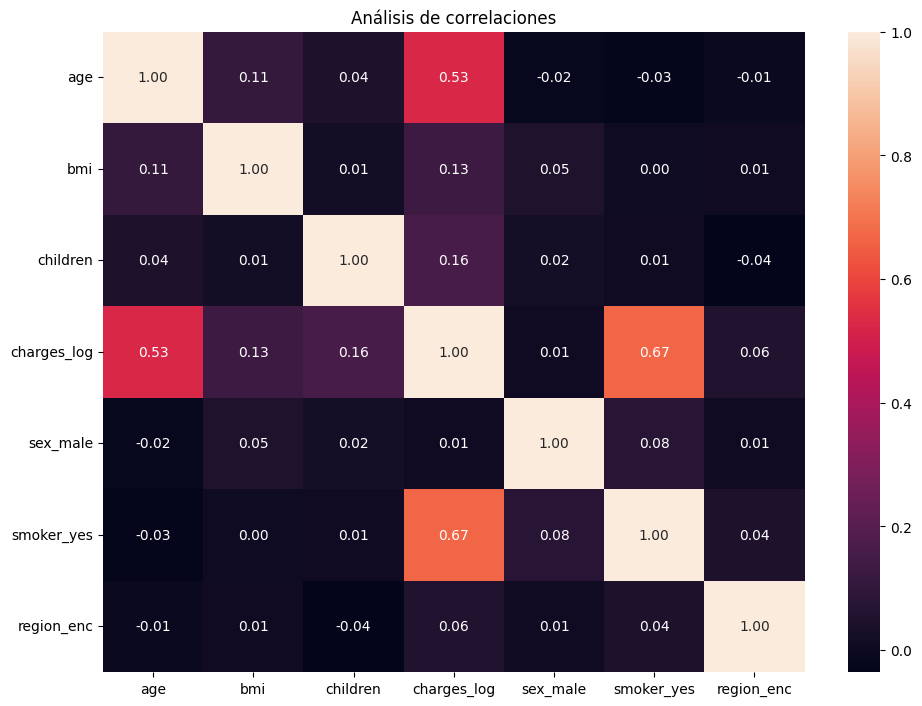

In [157]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(df_final.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.title('Análisis de correlaciones')

plt.show()

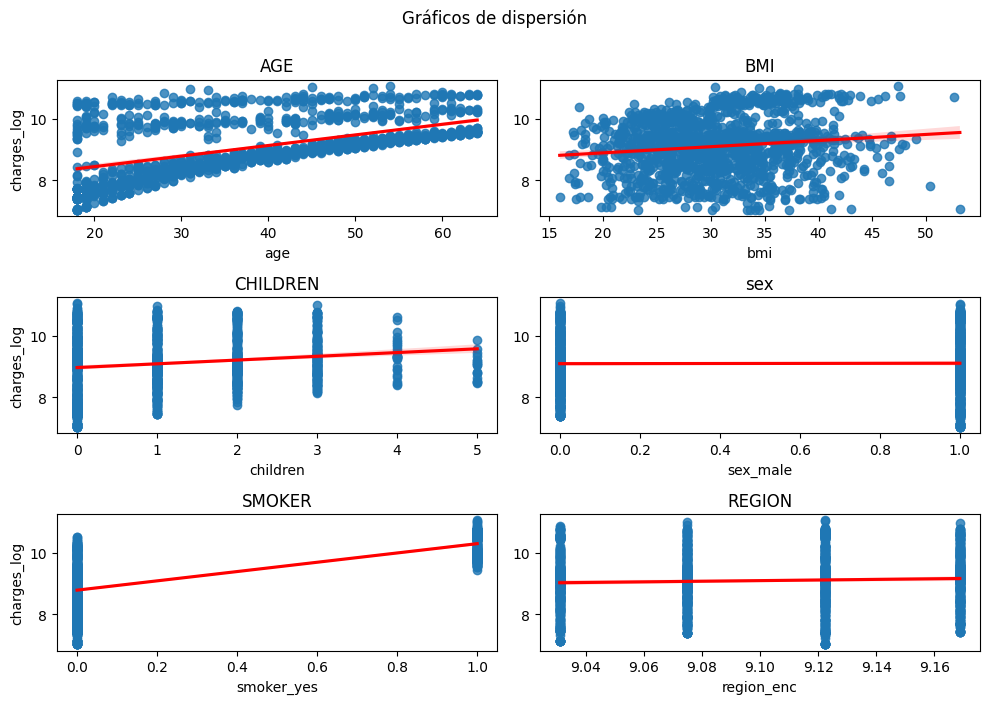

In [217]:
fig, ax = plt.subplots(3, 2, figsize = (10, 7))

sns.regplot(data = df_final, x= 'age', y= 'charges_log', ax=ax[0, 0], line_kws = {'color' : 'red'})
ax[0, 0].set_title('AGE')

sns.regplot(data = df_final, x= 'bmi', y= 'charges_log', ax=ax[0, 1], line_kws = {'color' : 'red'}).set_ylabel(None)
ax[0, 1].set_title('BMI')

sns.regplot(data = df_final, x= 'children', y= 'charges_log', ax=ax[1, 0], line_kws = {'color' : 'red'})
ax[1, 0].set_title('CHILDREN')

sns.regplot(data = df_final, x= 'sex_male', y= 'charges_log', ax=ax[1, 1], line_kws = {'color' : 'red'}).set_ylabel(None)
ax[1, 1].set_title('sex')

sns.regplot(data = df_final, x= 'smoker_yes', y= 'charges_log', ax=ax[2, 0], line_kws = {'color' : 'red'})
ax[2, 0].set_title('SMOKER')

sns.regplot(data = df_final, x= 'region_enc', y= 'charges_log', ax=ax[2, 1], line_kws = {'color' : 'red'}).set_ylabel(None)
ax[2, 1].set_title('REGION')

fig.suptitle('Gráficos de dispersión', y = 1)
plt.tight_layout()

plt.show()

Como se observa tanto en el gráfico de correlaciones como en los gráficos de dispersión, las variables no tienen una fuerte correlación con la variable objetivo salvo la edad y si la observación es fumadora o no. 

In [159]:
X = df_final[var_ind]
y = df_final['charges_log']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

In [161]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     720.0
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:25:59   Log-Likelihood:                -816.29
No. Observations:                1337   AIC:                             1647.
Df Residuals:                    1330   BIC:                             1683.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4428      2.189      0.659      0.5

In [162]:
residuos = results.resid

In [171]:
print(residuos.mean())

-7.020794649545807e-14


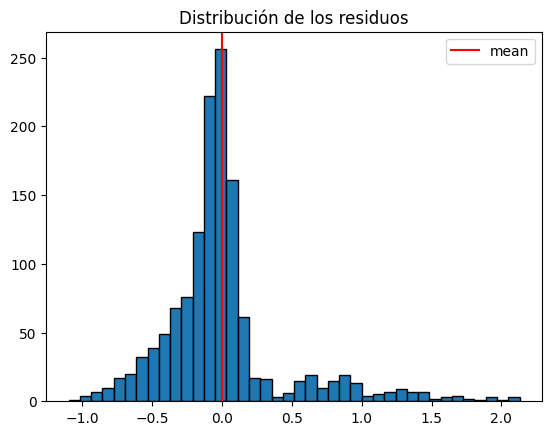

In [174]:
plt.hist(residuos, bins=40, edgecolor = 'black')
plt.title('Distribución de los residuos')
plt.axvline(-7.020794649545807e-14, color = 'red', label = 'mean')
plt.legend()
plt.show()

Aunque los residuos del modelo tenga un poco de cola (Skew: 1.634), podemos ver la media es prácticamente 0. Así que no creo que tengamos problemas de precisón a la hora de predecir la variable charges.

In [177]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [178]:
vif_data

,Variable,VIF
0,const,32114.692994
1,age,1.015068
2,bmi,1.014622
3,children,1.003505
4,sex_male,1.008931
5,smoker_yes,1.008485
6,region_enc,1.003358


Todas las variables mantienen un VIF bajo, por lo tanto no hay peligro de colinealidad

Text(0.5, 1.0, 'REGION')

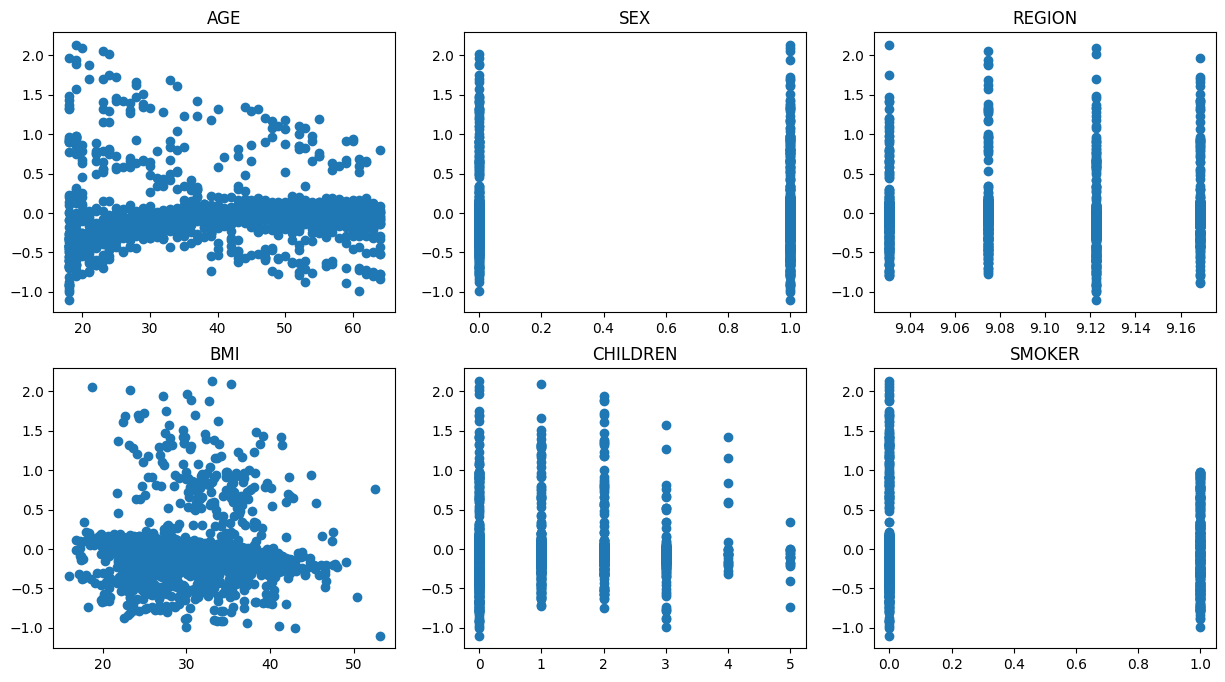

In [194]:
fig, ax = plt.subplots(2,3, figsize = (15,8))

ax[0,0].scatter(X['age'], residuos)
ax[0,0].set_title('AGE')

ax[1,0].scatter(X['bmi'], residuos)
ax[1,0].set_title('BMI')


ax[1,1].scatter(X['children'], residuos)
ax[1,1].set_title('CHILDREN')

ax[0,1].scatter(X['sex_male'], residuos)
ax[0,1].set_title('SEX')

ax[1,2].scatter(X['smoker_yes'], residuos)
ax[1,2].set_title('SMOKER')

ax[0,2].scatter(X['region_enc'], residuos)
ax[0,2].set_title('REGION')


Los scatterplots no muestran patrones claros en la mayoría de los casos, lo que sugiere que el modelo es razonablemente bueno. Aunque podemos obsrvar que la en la variable "children" el error sigue un pequeño patrón. Eso podría ser porque el modelo predice con mayor precisión (menor error) para familias con 4 o más hijos en comparación con aquellas que tienen 0 a 3 hijos. Esto podría implicar que para estos casos (familias más grandes), el modelo captura mejor la relación entre las variables predictoras y la variable dependiente

In [220]:
X = df_final[var_ind]
y = df_final['charges_log']

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [222]:
binary_cols = X_train[(X_train==0)|(X_train==1)].dropna(axis=1).columns.values
binary_cols

array(['sex_male', 'smoker_yes'], dtype=object)

In [223]:
#Creo dos nuevos dataframes que solo contienen los datos numéricos y son los que voy a escalar.
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

In [224]:
# Escalo las variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train_num)
X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

In [230]:
#Volvemos a unir los dataframes de numericos (ahora scalados entre 0-1) y los datos binarios
X_train_sc_df = pd.concat([pd.DataFrame(X_train_num_sc, columns= X_train_num.columns), X_train[binary_cols].reset_index(drop = True)], axis= 1)
X_test_sc_df = pd.concat([pd.DataFrame(X_test_num_sc, columns= X_test_num.columns), X_test[binary_cols].reset_index(drop = True)], axis= 1)

In [231]:
X_train_sc_df["charges_log"] = list(y_train)
X_test_sc_df["charges_log"] = list(y_test)
X_train_sc_df.to_csv("../data/processed/clean_train_charges.csv", index = False)
X_test_sc_df.to_csv("../data/processed/clean_test_charges.csv", index = False)

## **Modelo de Regresión lineal**

In [232]:
train_data = pd.read_csv("../data/processed/clean_train_charges.csv")
test_data = pd.read_csv("../data/processed/clean_test_charges.csv")

train_data.head()

,age,bmi,children,region_enc,sex_male,smoker_yes,charges_log
0,0.108696,0.230024,0.0,1.000000,1.0,0.0,7.781596
1,0.065217,0.263250,0.4,1.000000,1.0,0.0,8.095559
2,0.739130,0.580172,0.4,0.318021,0.0,0.0,10.418464
3,0.978261,0.686306,0.0,0.663204,1.0,0.0,9.503412
4,0.630435,0.286252,0.4,1.000000,0.0,0.0,9.181513


In [236]:
X_train = train_data.drop(["charges_log"], axis = 1)
y_train = train_data["charges_log"]
X_test = test_data.drop(["charges_log"], axis = 1)
y_test = test_data["charges_log"]

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

model = linear_model.LinearRegression()

In [250]:
model.fit(X_train, y_train)

LinearRegression()

In [243]:
y_pred = model.predict(X_test)
y_pred

array([ 8.91839356,  8.68266774,  9.47225847, 10.22218628,  8.65813222,
        9.26311612,  9.99057915,  8.028533  ,  9.01185221,  9.24476473,
        9.34466821, 10.5612856 , 10.08981199,  9.5773647 ,  8.88675843,
        8.98839167,  8.08185022, 10.22284544,  8.28448101,  8.4671181 ,
        8.09715277, 10.16465885,  9.39449519, 10.20820446, 10.07688727,
        8.31725046, 10.65931021, 10.87471155,  9.18406204,  9.42944457,
        8.47233037,  9.19222475,  7.94798382,  9.35306214, 10.94626747,
        9.22810622,  8.47442249,  8.57407472, 10.54564412,  9.0306822 ,
        8.26127668, 10.49040339, 10.67075564,  9.19468203,  9.0202628 ,
        8.24995084,  8.12991436,  8.90754413,  8.37132608,  8.86467191,
        8.57072895,  8.79878096, 10.44777257,  8.02636532,  8.96416351,
        9.01723847,  9.14444608,  8.23120269, 10.12645817,  8.89231305,
        9.58155075,  8.72290792,  9.35493188,  7.89955063,  9.57831565,
        9.34340303,  8.80307665, 10.23909851,  9.41842543,  9.69

In [252]:
from sklearn.metrics import mean_squared_error, r2_score
print('Coeficientes:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred))
print('Coeficiente de determination (R^2): %.2f' % r2_score(y_test, y_pred))

Coeficientes: [ 1.57084521  0.40948917  0.50096428  0.0619304  -0.07442294  1.52930516]
Intercept: 7.800058838022712
Mean squared error (MSE): 0.16
Coeficiente de determination (R^2): 0.82


In [264]:
X_train.columns

Index(['age', 'bmi', 'children', 'region_enc', 'sex_male', 'smoker_yes'], dtype='object')

### Conclusiones:
1. Todas las variables tienen una relación positiva con la prima del seguro médico menos la variable "sex". Esto significa que en teoría, de media, un incremento unitario de las características del modelo supondría un incemento del correspondiente coeficiente de la variable en la prima del seguro médico. 
2. Por otra parte, podemos ver que la relación entre sexo y prima del seguro médico es negativa. Eso significa que si la observación se tratara de un hombre, en teoría de media, el coste del seguro dismnuiria 0.07 unidades monetarias.
3. En cambio, una persona que fuma, de media tendra un seguro 1.5 unidades monetarias más caro que alguien que no es fumador.
4. Podemos ver que de media el mínimo coste de un seguro médico es de 7.8 unidades monetarias.
5. Y por último podemos decir que la variabilidad del coste del seguro médico esta explicado un 82% por las varaibles independientes del modelo y que el error cuadrático medio es muy cercano a 0, por lo tanto podemos decir que tenemos un buen modelo regresivo. 

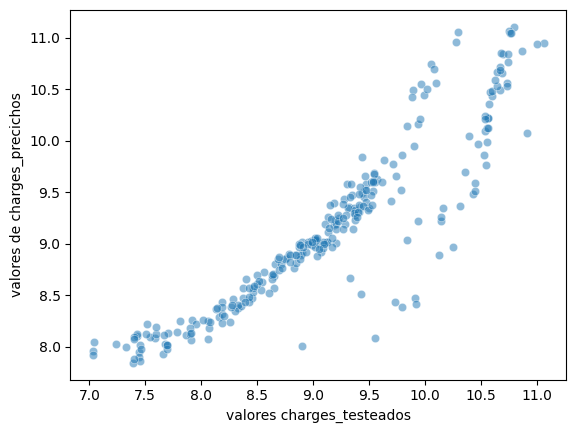

In [262]:
sns.scatterplot(x = y_test,  y = y_pred, alpha = 0.5)
plt.xlabel('valores charges_testeados')
plt.ylabel('valores de charges_precichos')
plt.show()

A través del gráfico de dispersión podemos ver los valores testeados y los valores predichos en el modelo. Se observa que los valores mantienen un misma dirección y por lo tanto un fuerte relación. Como he dicho antes, las variables ofrecen un buen resultado predictivo.